In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
from sklearn import datasets
data=datasets.load_boston()

In [ ]:
data

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

###Creating The dataframe

In [ ]:
new_data=pd.DataFrame(data.data,columns=data.feature_names)
new_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
new_data['houseprice']=data.target
new_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,houseprice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


####Agrregate Dependent and Independent Variable

In [ ]:
X=new_data.iloc[:,0:13]
y=new_data.iloc[:,13]

In [ ]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: houseprice, Length: 506, dtype: float64

####Splitting The data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

Scaling The data Into standard Form

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [ ]:
X_train

array([[-0.37257438, -0.49960763, -0.70492455, ..., -0.48463784,
         0.3716906 , -0.41100022],
       [-0.39709866, -0.49960763, -0.04487755, ...,  0.33649132,
         0.20501196, -0.38768057],
       [-0.402693  ,  0.77116771, -0.88675963, ..., -0.84958414,
         0.36660893, -0.18191902],
       ...,
       [-0.39805586, -0.49960763, -0.15941933, ..., -0.30216469,
         0.40342278, -0.33006734],
       [-0.38842357, -0.49960763, -0.60326872, ..., -0.25654641,
         0.38343489,  0.8359148 ],
       [-0.39951258, -0.49960763, -1.01275558, ..., -0.84958414,
         0.43041207,  0.27212814]])

In [ ]:
X_test

array([[-0.43675261, -0.43988269, -1.26009787, ..., -0.74834628,
         0.26741336, -0.78804285],
       [ 0.46354201, -0.43988269,  1.09537107, ...,  0.86739045,
         0.17734381, -0.44982353],
       [-0.43213476, -0.43988269,  0.42804104, ..., -0.99315487,
         0.45162847, -0.30001862],
       ...,
       [-0.4286898 ,  0.69889992, -0.96051265, ...,  0.62258186,
         0.46524826,  0.10924221],
       [-0.42955423, -0.43988269, -0.09504426, ...,  0.08400295,
         0.37279275, -0.47298923],
       [-0.43078212, -0.43988269, -0.41682097, ...,  1.21012249,
         0.46654065, -0.02666327]])

### Now Importing The Linear Model from Sklearn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet




##Initializing the models

---

###And Than Fitting the Model


In [ ]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
rid=Ridge()
rid

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
rid.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
la=Lasso()
la

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
la.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elNet=ElasticNet()
elNet

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elNet.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

###Now Plotting the Models

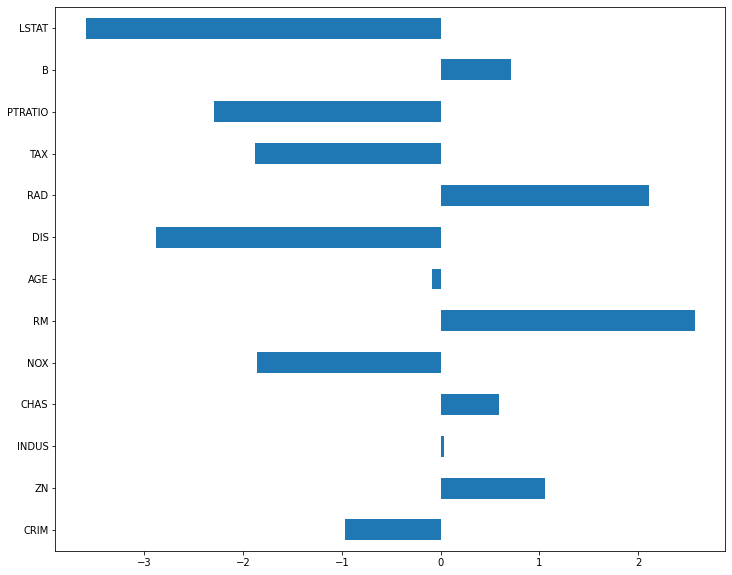

In [ ]:
plt.figure(figsize=(12,10))
im_coeff=pd.Series(lm.coef_,index=data.feature_names)
im_coeff.plot(kind='barh')#for horizantal

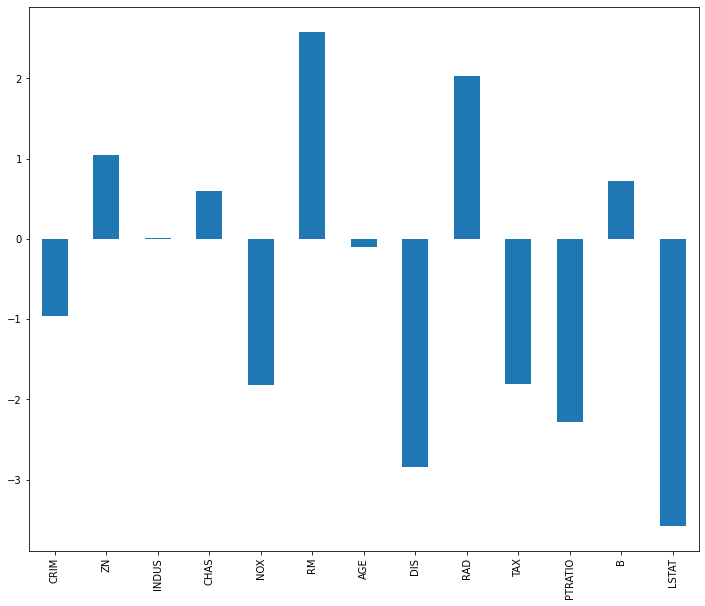

In [ ]:
plt.figure(figsize=(12,10))
im_coeff=pd.Series(rid.coef_,index=data.feature_names)
im_coeff.plot(kind='bar')

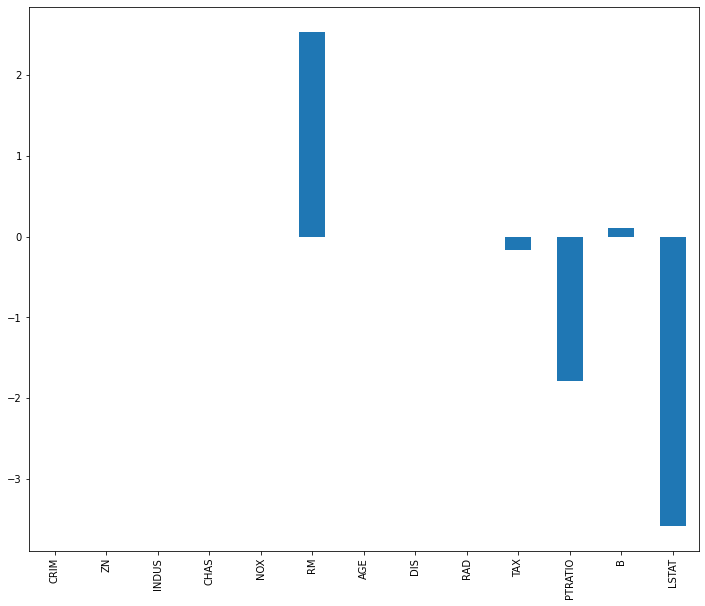

In [ ]:
plt.figure(figsize=(12,10))
im_coeff=pd.Series(la.coef_,index=data.feature_names)
im_coeff.plot(kind='bar')

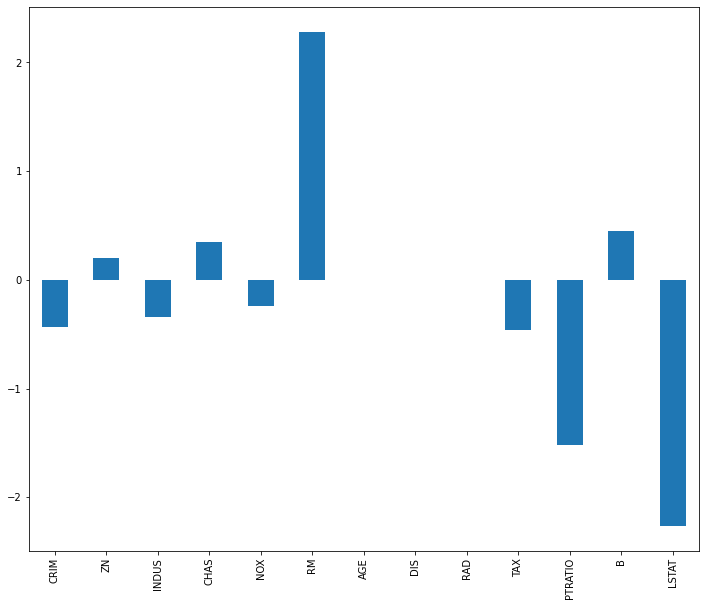

In [ ]:
plt.figure(figsize=(12,10))
im_coeff=pd.Series(elNet.coef_,index=data.feature_names)
im_coeff.plot(kind='bar')

###This Above Bar Graph Shows which has each Value of Regression Coefficient As value having Higher value of Regression Coefficinet So  this means that Variable has important to Predict our target variable

In [ ]:
pred_test_lm=lm.predict(X_test)
pred_test_rid=rid.predict(X_test)
pred_test_la=la.predict(X_test)

pred_test_elNet=elNet.predict(X_test)




In [ ]:
print("Linear Regression Model")
metrics.mean_squared_error(y_test,pred_test_lm)


Linear Regression Model


35.11642077929319

In [ ]:
metrics.r2_score(y_test,pred_test_lm)

0.5687450086990022

In [ ]:
lm.score(X_test,y_test)

0.5687450086990022

In [ ]:
print("Ridge Regression Model")
metrics.mean_squared_error(y_test,pred_test_rid)


Ridge Regression Model


35.188945727501846

In [ ]:
metrics.r2_score(y_test,pred_test_rid)

0.5678543499924842

In [ ]:
rid.score(X_test,y_test)

0.5678543499924842

In [ ]:
print("Lassso Regression Model")
metrics.mean_squared_error(y_test,pred_test_la)


Lassso Regression Model


40.62043710016924

In [ ]:
metrics.r2_score(y_test,pred_test_la)

0.5011517159343937

In [ ]:
la.score(X_test,y_test)

0.5011517159343937

In [ ]:
print("ElasticNet Regression Model")
metrics.mean_squared_error(y_test,pred_test_elNet)


ElasticNet Regression Model


43.256122648084435

In [ ]:
metrics.r2_score(y_test,pred_test_elNet)

0.46878359518592105

In [ ]:
elNet.score(X_test,y_test)

0.46878359518592105

###Obtaining the best Alpha Value

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={'alpha':[1,5,10,20,35,45,50,55,60,75,85,90,100]}
ridge_regressor=GridSearchCV(rid,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 5, 10, 20, 35, 45, 50, 55, 60, 75, 85, 90,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
ridge_regressor.best_params_

{'alpha': 5}

In [ ]:
ridge_regressor.best_score_

-21.12280631366718

In [ ]:
parameters={'alpha':[1e-4,1e-3,1e-2,1,5,10,20,35,45,50,55,60,75,85,90,100]}
lasso_regressor=GridSearchCV(la,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20, 35, 45,
                                   50, 55, 60, 75, 85, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso_regressor.best_params_

{'alpha': 0.01}

In [ ]:
lasso_regressor.best_score_

-21.142893189527033

In [ ]:
parameters={'alpha':[1e-4,1e-3,1e-2,1,5,10,20,35,45,50,55,60,75,85,90,100]}
elNet_regressor=GridSearchCV(elNet,parameters,scoring='neg_mean_squared_error',cv=5)
elNet_regressor.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1, 5, 10, 20, 35, 45,
                                   50, 55, 60, 75, 85, 90, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
elNet_regressor.best_params_

{'alpha': 0.01}

In [ ]:
elNet_regressor.best_score_

-21.13535691485955